## **Conversion Rate Optimization for XYZ Company's Advertising Campaign ✅**

### **Objective:** Analyze the advertising campaign dataset of XYZ company to predict ad performance and provide recommendations to improve conversion rates.
### **Dataset:** The provided dataset contains information about each ad, including: [Link](https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking)

### **Tasks: 👉**

- Data Exploration and Preprocessing
- Model Development
- Feature Importance and Interpretation
- Recommendations<br>
 Based on your findings, provide recommendations for improving the conversion rate of the advertising campaign. Consider aspects such as user targeting, ad design, budget allocation, and ad placement strategies.
 



In [1]:
# Importing necessary Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data Set
df = pd.read_csv('Data\Raw\KAG_conversion_data.csv')

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
#Checking the Shape of our dataset with
df.shape

(1143, 11)

**This data is about a company's social media ad campaign.It contains different factors considered for social media campaigning.We have a total of 1143 rows and 11 columns.**

- **ad_id:** a unique ID for each ad.
- **xyz_campaign_id:** an ID associated with each ad campaign of XYZ company.
- **fb_campaign_id:** an ID associated with how Facebook tracks each campaign.
- **age:** age of the person to whom the ad is shown.
- **gender:** gender of the person to whom the ad is shown.
- **interest:** a code specifying the category to which the person's interest belongs (interests are as mentioned in the person's Facebook public profile).
- **Impressions:** the number of times the ad was shown.
- **Clicks:** number of clicks on for that ad.
- **Spent:** Amount paid by XYZ company to Facebook, to show that ad.
- **Total_conversion:** Total number of people who inquired about the product after seeing the ad.
- **Approved_conversion:** Total number of people who bought the product after seeing the ad.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


It show column name, number of data in each column along with their data type. It also show the count of non-null values.

### **Descriptive Statistics**

In [6]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

- **Count:** Tell the number of rows in the data set 
- **mean:** Mean of the values in that column 
- **std:** Standard deviation of values in that column 
- **min and max:** Minimum and maximum value of that column 
- **25%, 50% and 70% :** This value show the 25th, 50th, and 75th percentiles.

**We can understand from this following table that average of 2.85 people who enquired about each ad and we have maximum 21 people who buys a product after enquiring and have a maximum 60 people who enquiring about the ad. The maximum clicks we receive in an ad is 421.**

### **Missing Values 👈**

In [7]:
print(df.isnull().sum())

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64


Hurray! Here we can see that there is no missing values in our data.

### **Data Cleaning 🫧**

- Dropped outliers for variables Impressions and Spent. The cut off was at >2,000,000 for Impressions and >500 for Spent (5 rows were dropped as result)

<Axes: >

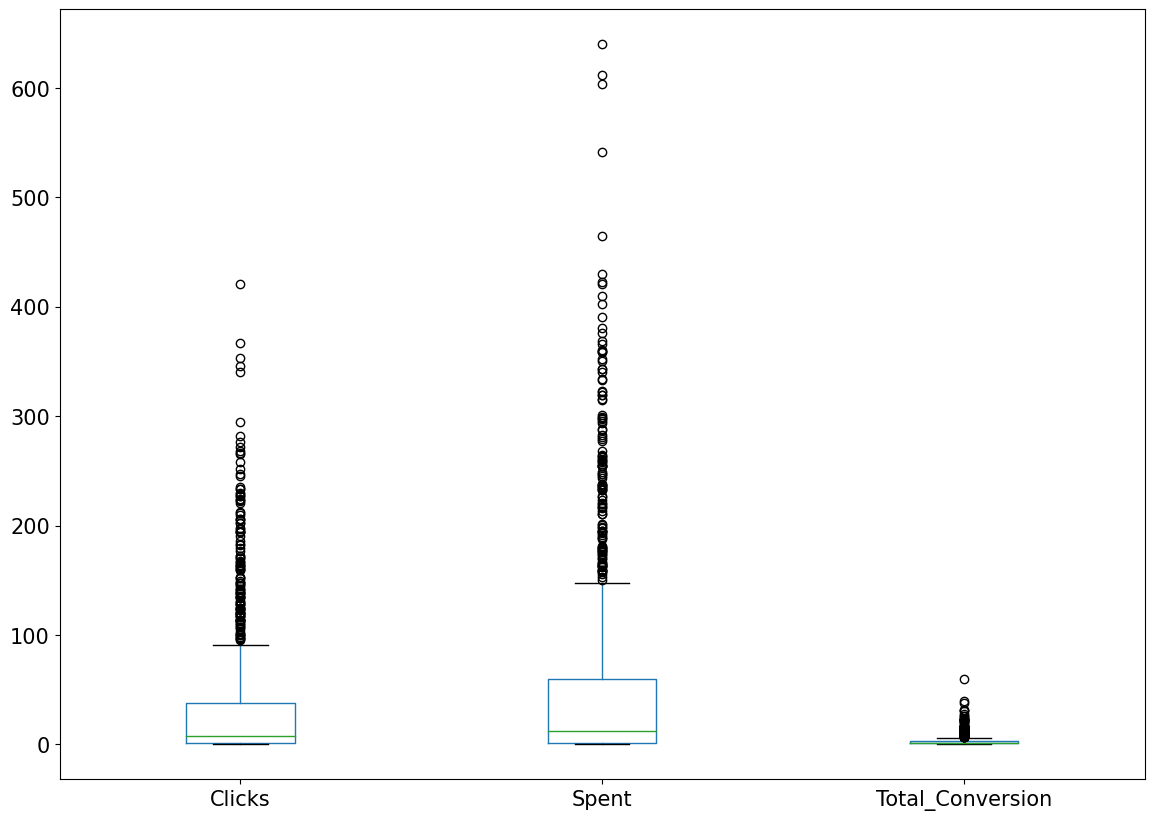

In [8]:
df.iloc[:,7:-1].boxplot(grid=False, fontsize=15, figsize=(14,10))

<Axes: >

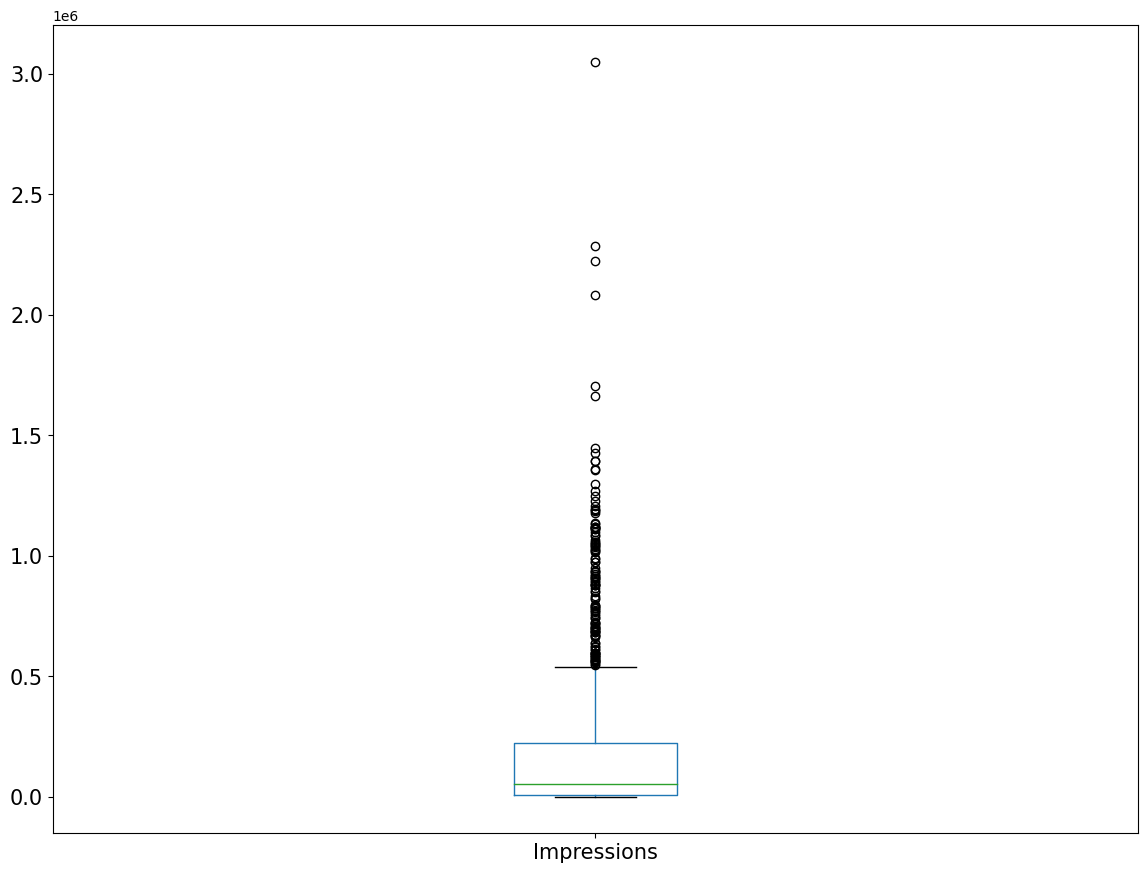

In [9]:
df.iloc[:,6:7].boxplot(grid=False, fontsize=15, figsize=(14,10.5))

In [10]:
#Checking for duplicates values
df.duplicated().sum()

0

In [11]:
#Numerical Features & Categorical Features
numb_feat = numerical = ['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion','interest']
cato_feat = ['age', 'gender']

In [12]:
#Age Value_counts
df['age'].value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

In [13]:
df['gender'].value_counts()

M    592
F    551
Name: gender, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['gender'] = lb.fit_transform(df['gender'])

In [15]:
df['gender'].value_counts()

1    592
0    551
Name: gender, dtype: int64

In [16]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,1,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,1,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,1,20,693,0,0.00,1,0
3,708815,916,103928,30-34,1,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,1,28,4133,1,1.29,1,1


In [17]:
print('AD Unique',df['ad_id'].nunique())
print('_____________________')
print('AD Value Counts: ',df['ad_id'].value_counts().sum())
print('_____________________')
print('XYZ Unique: ',df['xyz_campaign_id'].nunique())
print('_____________________')
print('XYZ Value counts: ',df['xyz_campaign_id'].value_counts())
print('_____________________')
print('FB Unique: ',df['fb_campaign_id'].nunique())
print('_____________________')
print('FB Value Count: ',df['fb_campaign_id'].value_counts())


AD Unique 1143
_____________________
AD Value Counts:  1143
_____________________
XYZ Unique:  3
_____________________
XYZ Value counts:  1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64
_____________________
FB Unique:  691
_____________________
FB Value Count:  144536    6
144562    6
144599    6
144636    6
144611    6
         ..
115866    1
115870    1
115876    1
115878    1
179982    1
Name: fb_campaign_id, Length: 691, dtype: int64


 we can stay with one id
 

### **Exploratory Data Analysis 🙂**

In [18]:
print(df['xyz_campaign_id'].unique())

[ 916  936 1178]


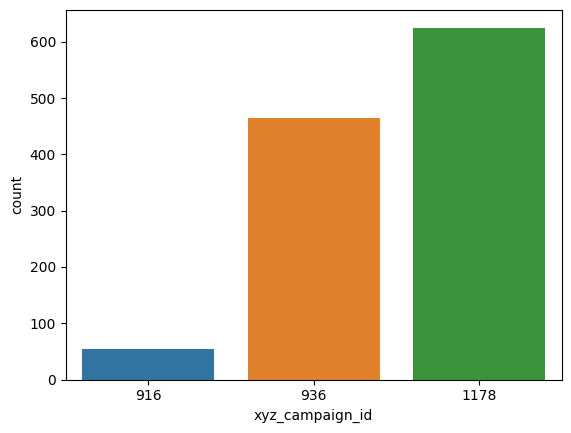

In [19]:
sns.countplot(x="xyz_campaign_id",data = df)
plt.show()

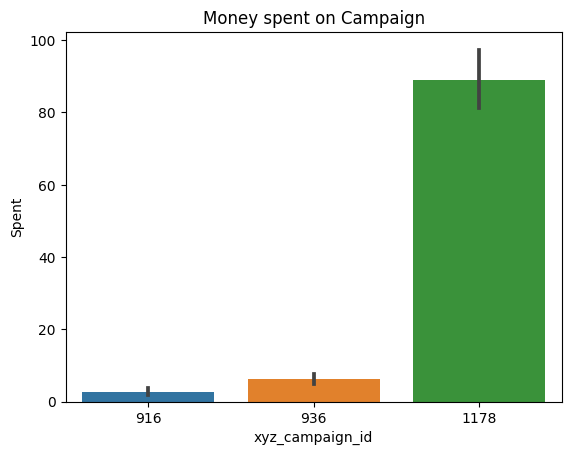

In [20]:
sns.barplot(x="xyz_campaign_id",y= "Spent",data = df).set_title("Money spent on Campaign")
plt.show()

Money spent on camapaign with campaign id 1178 is almost 4 times of the other two campaign.

,ad_id,xyz_campaign_id,fb_campaign_id,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,1.000000,0.929892,0.972002,0.058324,0.456483,0.462308,0.431981,0.433053,0.346539,0.271331
xyz_campaign_id,0.929892,1.000000,0.872392,0.086118,0.272282,0.495273,0.469729,0.476689,0.346684,0.284968
fb_campaign_id,0.972002,0.872392,1.000000,0.038037,0.595753,0.439439,0.406978,0.403532,0.344170,0.257658
gender,0.058324,0.086118,0.038037,1.000000,-0.047230,-0.067059,-0.168725,-0.125022,-0.027559,0.025350
interest,0.456483,0.272282,0.595753,-0.047230,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353
Impressions,0.462308,0.495273,0.439439,-0.067059,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249
Clicks,0.431981,0.469729,0.406978,-0.168725,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526
Spent,0.433053,0.476689,0.403532,-0.125022,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178
Total_Conversion,0.346539,0.346684,0.344170,-0.027559,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034
Approved_Conversion,0.271331,0.284968,0.257658,0.025350,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000


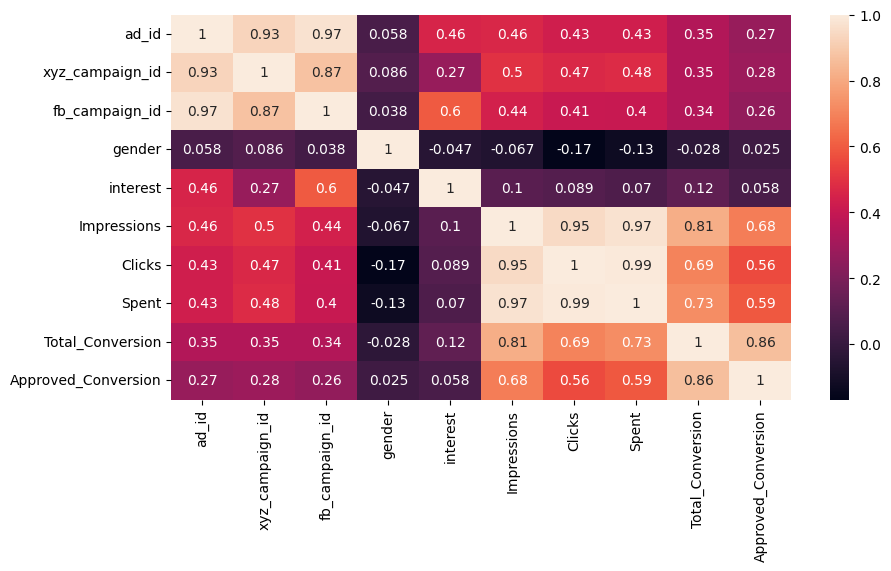

In [21]:
plt.figure(figsize=(10,5))
c= df.corr()
#checking corr through haetmap
sns.heatmap(df.corr(), annot = True)
c

**Here it's clear, "Impressions" and "Total_Conversion" are more correlated with "Approved_Conversion" , "Clicks" and "Spent".**

<Axes: xlabel='Approved_Conversion', ylabel='count'>

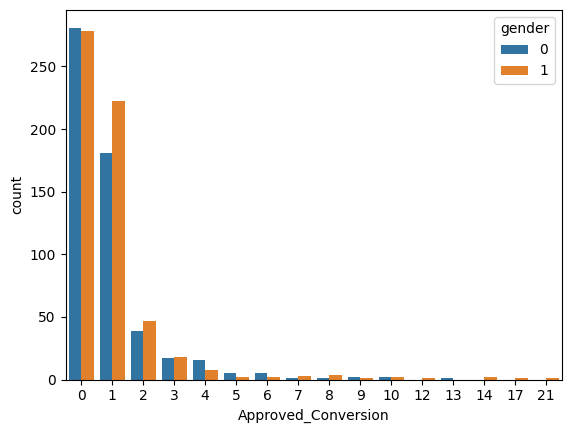

In [22]:
sns.countplot(x='Approved_Conversion',hue='gender',data=df)

it is quite evident that more men have bought the product after seeing the ad so a man buying the product after ad is more probable than a woman

<Axes: xlabel='Total_Conversion', ylabel='count'>

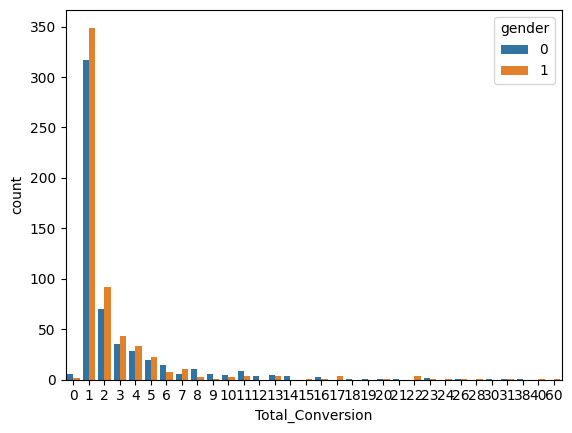

In [23]:
sns.countplot(x='Total_Conversion',hue='gender',data=df)

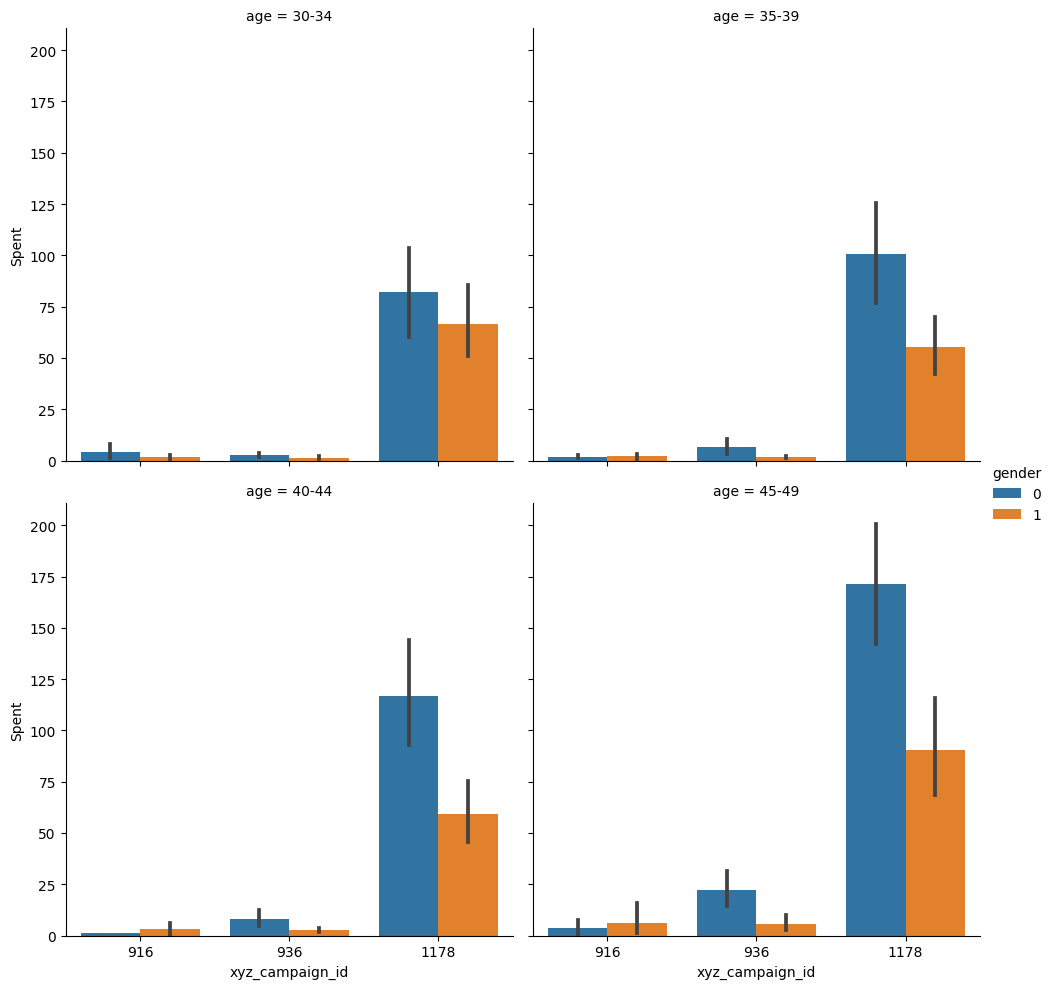

In [24]:
sns.catplot(x="xyz_campaign_id", y="Spent",hue="gender", col="age",kind="bar",data=df,col_wrap=2)

The graph show that age group 45-49 has clicked on ad maximum number of time as compared to other age group people. Females of the group has clicked more time on ads in comparison with males.

<Axes: xlabel='age', ylabel='Clicks'>

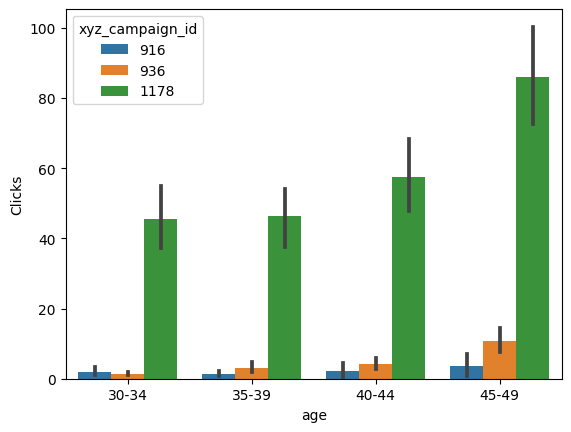

In [25]:
sns.barplot(x="age",y="Clicks", data = df, hue = "xyz_campaign_id")

This graph tell that in all the age group ads which campaign id 1178 was clicked most of the time as compared to other.

<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

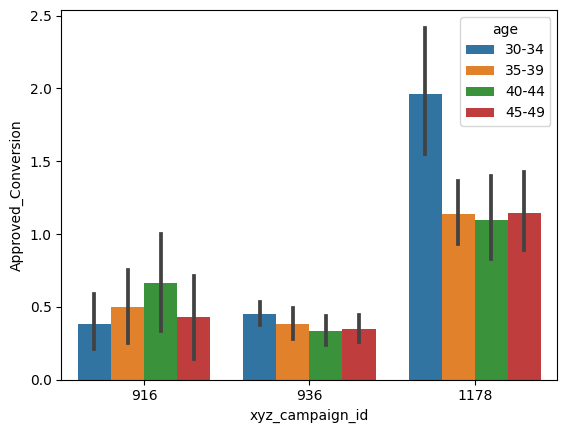

In [26]:
sns.barplot(x="xyz_campaign_id", y = "Approved_Conversion", hue= "age", data = df)

As we have seen earlier that in campaign id 1178 maximum click was being done with people of age group 45-49. But in the above graph we can see that maximum approved conversion are being made by people of age group 30-34, which has made less number of click as comapred to all the other age group.

So, ads with campaign id 1178 can target people of age group 30-34, whereas 936 can target mostly on age group 30-34 as well. Campaign id 916 can target people of age group 40-44 as they purchase more number of time.

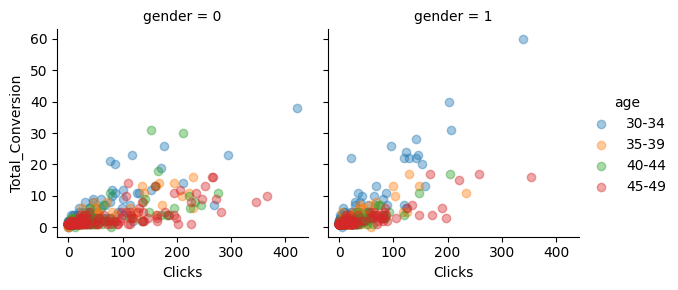

In [27]:
g = sns.FacetGrid(df, col="gender", hue="age")
g.map(plt.scatter, "Clicks", "Total_Conversion", alpha=.4)
g.add_legend();

#### From this graph we can conclude that:

- More clicks have been done by women
- But in the age group 30-34 men have enquired more than women after seeing ann ad
- The age group of 45-49 showed highest activity of clicking on ads

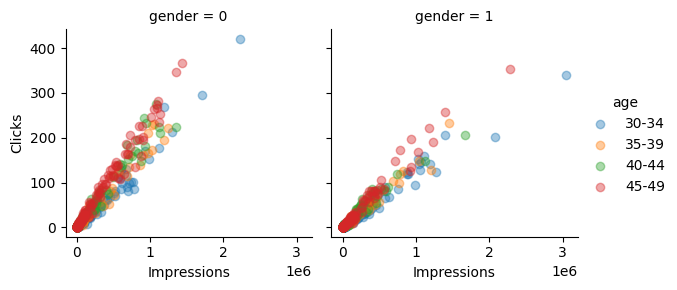

In [28]:
g = sns.FacetGrid(df, col="gender", hue="age")
g.map(plt.scatter, "Impressions", "Clicks", alpha=.4)
g.add_legend();

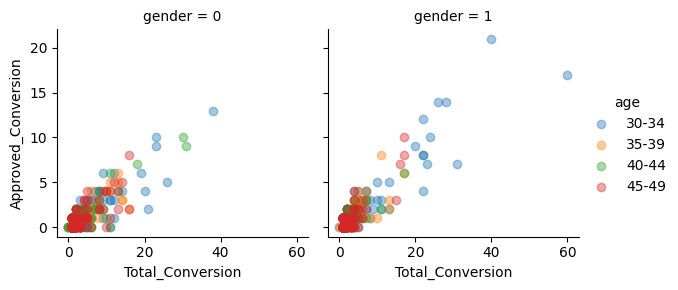

In [29]:
g = sns.FacetGrid(df, col="gender", hue="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend();

**DOUBT:** From this graph we can understand about people who bought the product after enquiring about it:

- Men tends to enquire more about the product than women
- More Men tends to buy product after enquiring than women

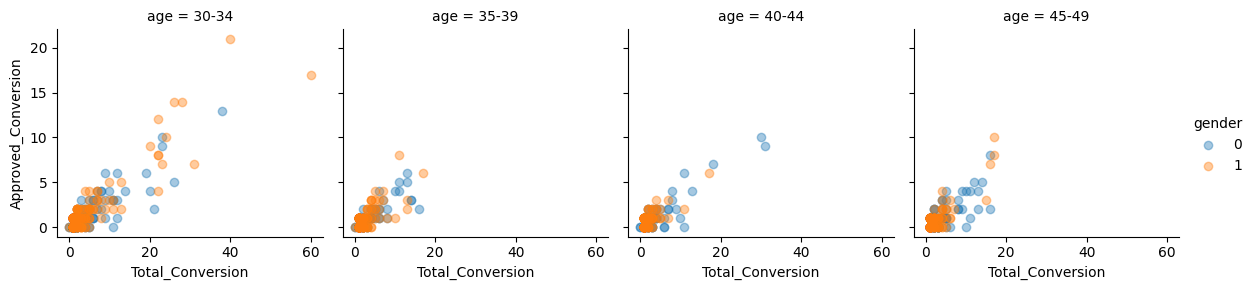

In [30]:
g = sns.FacetGrid(df, col="age", hue="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend();

This graph clearly depicts that men and women in the age group of 30-34 have bought the product after enquiring about it.The age group of 30-34 enquired about the product and bought the product more as compared to the rest of the age groups

<Axes: xlabel='xyz_campaign_id', ylabel='Impressions'>

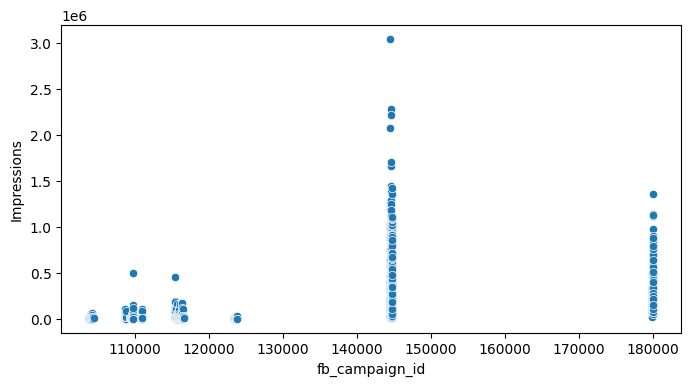

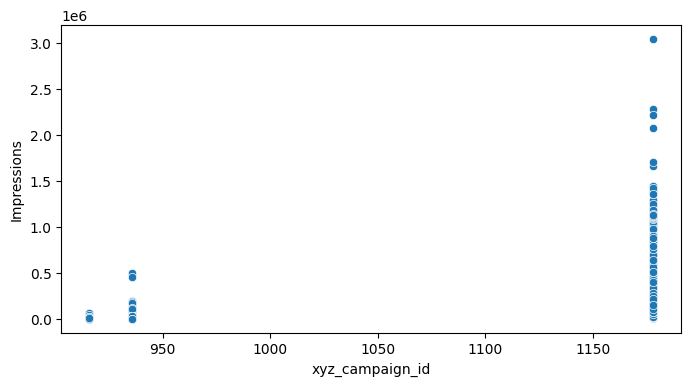

In [31]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'fb_campaign_id' ,y='Impressions', data=df)
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'xyz_campaign_id' ,y='Impressions', data=df)

The ads by xyz companies were displayed relatively fewer times than facebook ads. Hence fewer clicks than facebook ads

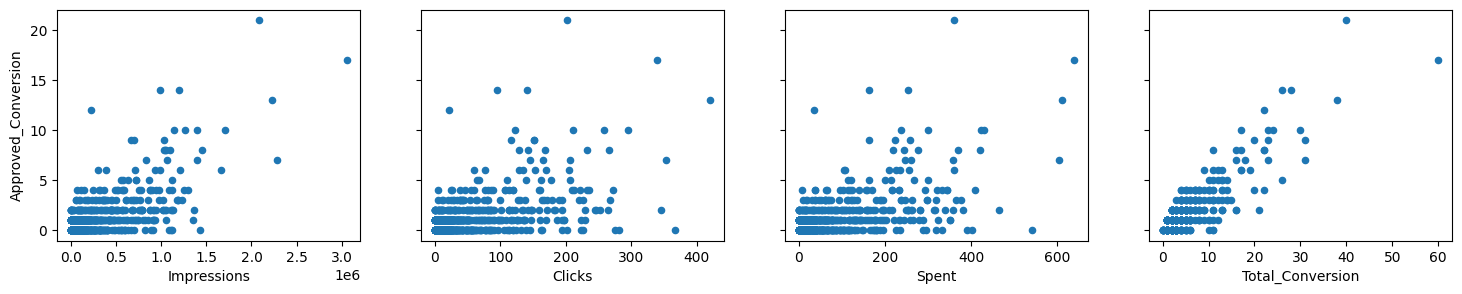

In [32]:
# visualize the relationship with Approved_Conversion using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 3))

for i, j in enumerate(['Impressions', 'Clicks', 'Spent', 'Total_Conversion']):
    df.plot(kind='scatter', x=j, y='Approved_Conversion', ax=axs[i])

plt.show()

In [33]:
# checking for correlation >0.75
correlation = abs(df.corr()) > 0.75
correlation

,ad_id,xyz_campaign_id,fb_campaign_id,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,True,True,True,False,False,False,False,False,False,False
xyz_campaign_id,True,True,True,False,False,False,False,False,False,False
fb_campaign_id,True,True,True,False,False,False,False,False,False,False
gender,False,False,False,True,False,False,False,False,False,False
interest,False,False,False,False,True,False,False,False,False,False
Impressions,False,False,False,False,False,True,True,True,True,False
Clicks,False,False,False,False,False,True,True,True,False,False
Spent,False,False,False,False,False,True,True,True,False,False
Total_Conversion,False,False,False,False,False,True,False,False,True,True
Approved_Conversion,False,False,False,False,False,False,False,False,True,True


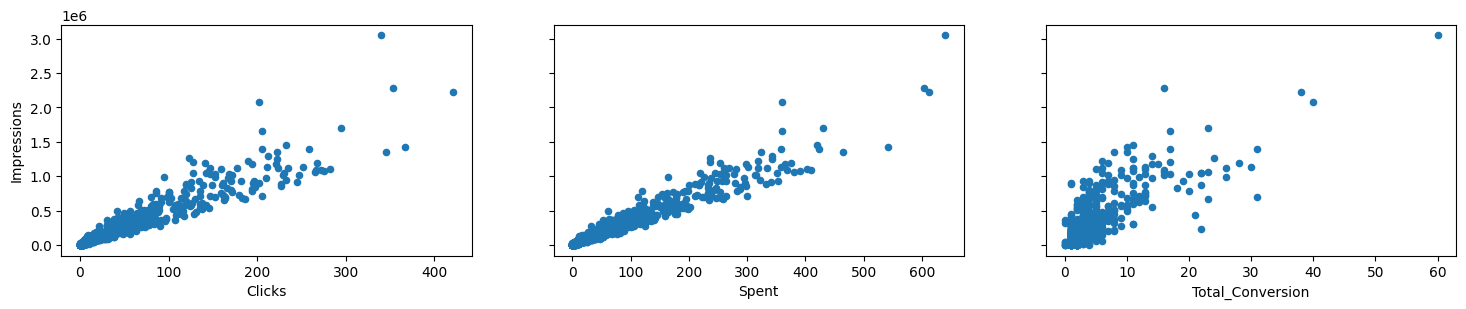

In [34]:
# visualize the relationship with of variables with high correlations
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 3))

for i, j in enumerate(['Clicks', 'Spent', 'Total_Conversion']):
    df.plot(kind='scatter', x=j, y='Impressions', ax=axs[i])

plt.show()

### **Dummy Variable**

In [35]:
#Converting categorical variables into numerical
df = pd.get_dummies(df, columns=['age'])

### **Feature Engineering 🫰**

**it's time for some feature engineering and let's introduce some additional features with the definitions**

- **Click-through-rate (CTR)** - This is the percentage of how many of our impressions became clicks. A high CTR is often seen as a sign of good creative being presented to a relevant audience. A low click through rate is suggestive of less-than-engaging adverts (design and / or messaging) and / or presentation of adverts to an inappropriate audience. What is seen as a good CTR will depend on the type of advert (website banner, Google Shopping ad, search network test ad etc.) and can vary across sectors, but 2% would be a reasonable benchmark.

- **Conversion Rate (CR)** -  This is the percentage of clicks that result in a 'conversion'. What a conversion is will be determined by the objectives of the campaign. It could be a sale, someone completing a contact form on a landing page, downloading an e-book, watching a video, or simply spending more than a particular amount of time or viewing over a target number of pages on a website.

- **Cost Per Click (CPC)** - how much (on average) did each click cost. While it can often be seen as desirable to reduce the cost per click, the CPC needs to be considered along with other variables. For example, a campaign with an average CPC of £0.5 and a CR of 5% is likely achieving more with its budget than one with a CPC of £0.2 and a CR of 1% (assuming the conversion value is the same).

- **Cost Per Conversion** - Another simple metric, this figure is often more relevant than the CPC, as it combines the CPC and CR metrics, giving us an easy way to quickly get a feel for campaign effectiveness.

In [36]:
# Creating Click-Through Rate (CTR) feature
df['CTR'] = df['Clicks'] / df['Impressions'] * 100

# Creating Cost per Click (CPC) feature
df['CPC'] = df['Spent'] / df['Clicks']

# Creating Cost per Conversion feature
df['Cost_per_Conversion'] = df['Spent'] / df['Approved_Conversion']

# Creating Conversion Rate feature
df['Conversion_Rate'] = df['Approved_Conversion'] / df['Total_Conversion'] * 100

In [37]:
#Check for missing values
MissingValues = df.isnull().sum()
print(MissingValues)
print()
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

ad_id                    0
xyz_campaign_id          0
fb_campaign_id           0
gender                   0
interest                 0
Impressions              0
Clicks                   0
Spent                    0
Total_Conversion         0
Approved_Conversion      0
age_30-34                0
age_35-39                0
age_40-44                0
age_45-49                0
CTR                      0
CPC                    207
Cost_per_Conversion    136
Conversion_Rate          8
dtype: int64



In [38]:
from sklearn.impute import KNNImputer
#Using KNN imputation to replace missing values
impute = KNNImputer(n_neighbors=5)
imputed_data = impute.fit_transform(df)
df = pd.DataFrame(imputed_data, columns=df.columns)

In [39]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
age_30-34              0
age_35-39              0
age_40-44              0
age_45-49              0
CTR                    0
CPC                    0
Cost_per_Conversion    0
Conversion_Rate        0
dtype: int64

### **Identifying Outliers 💣**

In [40]:
def remove_outliers_iqr(df):
    # Calculate the first and third quartiles
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Determine the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers from the dataframe
    new_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
    return pd.DataFrame(new_df)

In [41]:
data = remove_outliers_iqr(df)

In [42]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,CTR,CPC,Cost_per_Conversion,Conversion_Rate
0,708746.0,916.0,103916.0,1.0,15.0,7350.0,1.0,1.43,2.0,1.0,1.0,0.0,0.0,0.0,0.013605,1.430,1.430,50.0
1,708749.0,916.0,103917.0,1.0,16.0,17861.0,2.0,1.82,2.0,0.0,1.0,0.0,0.0,0.0,0.011198,0.910,7.174,0.0
2,708771.0,916.0,103920.0,1.0,20.0,693.0,0.0,0.00,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.258,0.000,0.0
3,708815.0,916.0,103928.0,1.0,28.0,4259.0,1.0,1.25,1.0,0.0,1.0,0.0,0.0,0.0,0.023480,1.250,0.580,0.0
4,708818.0,916.0,103928.0,1.0,28.0,4133.0,1.0,1.29,1.0,1.0,1.0,0.0,0.0,0.0,0.024195,1.290,1.290,100.0


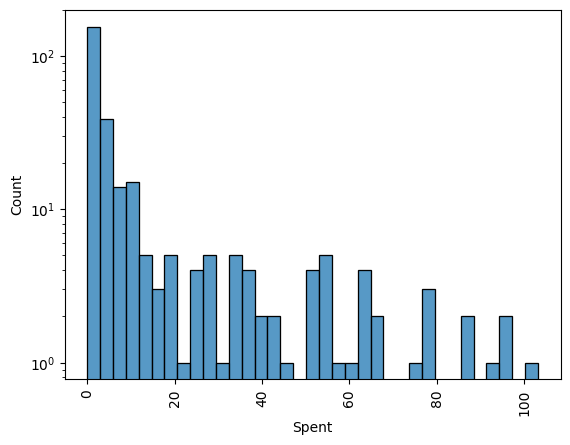

In [43]:
# Checking after removing outliers, back then it has 600+ now it is 100, so we can say we have removed outliers.
sns.histplot(data = data, x = 'Spent')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

<Axes: xlabel='Clicks'>

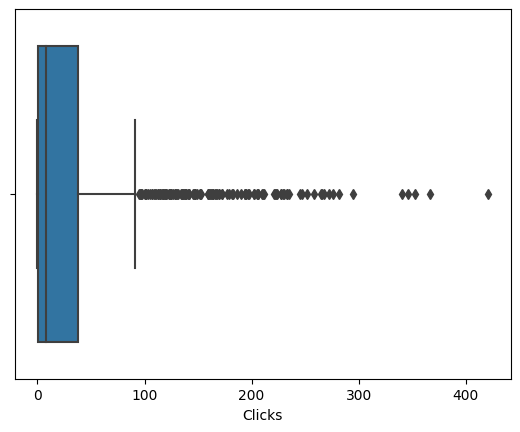

In [44]:
sns.boxplot(x=df['Clicks'])

<Axes: xlabel='Spent'>

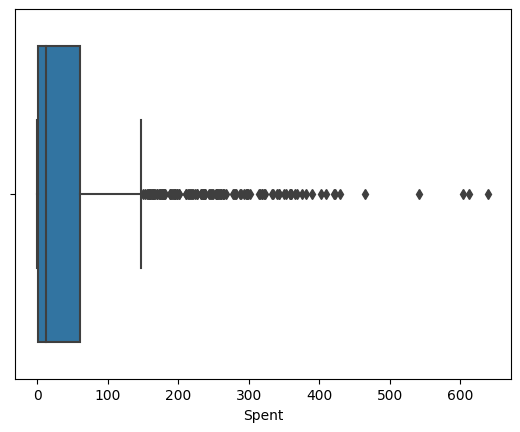

In [45]:
sns.boxplot(x=df['Spent'])

<Axes: xlabel='Total_Conversion'>

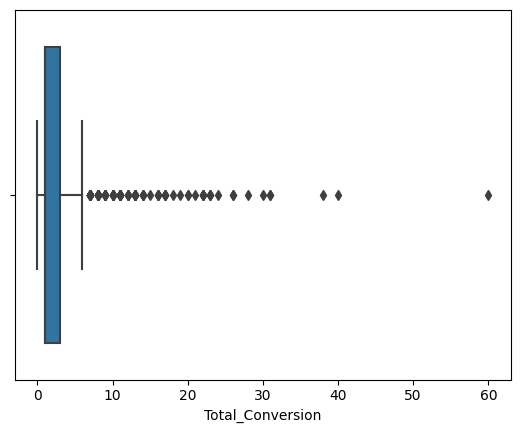

In [46]:
sns.boxplot(x=df['Total_Conversion'])

<Axes: xlabel='Approved_Conversion'>

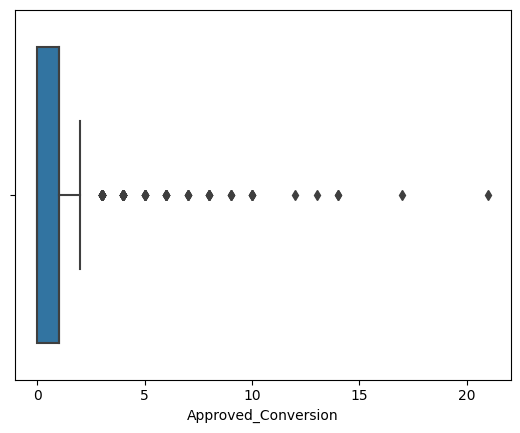

In [47]:
sns.boxplot(x=df['Approved_Conversion'])

### **Cleaned data 🧽**

In [48]:
data.drop(['fb_campaign_id','xyz_campaign_id'], axis = 1, inplace = True)

In [49]:
data.to_csv("Data\cleaned\Clean_Data.csv")

### **Modelling 🧠**

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [51]:
data['Approved_Conversion'].value_counts()

0.0    160
1.0    109
2.0     20
Name: Approved_Conversion, dtype: int64

In [52]:
X = data.drop(['Approved_Conversion','ad_id'],axis = 1)
y = data['Approved_Conversion']

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [54]:
X_train.head()

,gender,interest,Impressions,Clicks,Spent,Total_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,CTR,CPC,Cost_per_Conversion,Conversion_Rate
294,1.0,31.0,3279.0,0.0,0.00,1.0,1.0,0.0,0.0,0.0,0.000000,1.208,1.038,0.0
181,0.0,30.0,493.0,0.0,0.00,1.0,1.0,0.0,0.0,0.0,0.000000,1.111,0.000,0.0
178,0.0,26.0,10126.0,3.0,4.62,1.0,1.0,0.0,0.0,0.0,0.029627,1.540,4.040,0.0
235,0.0,2.0,506.0,0.0,0.00,1.0,1.0,0.0,0.0,0.0,0.000000,1.194,0.000,0.0
54,1.0,10.0,1772.0,0.0,0.00,1.0,1.0,0.0,0.0,0.0,0.000000,1.214,0.000,100.0


In [55]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("R2 score:", r2_score(y_test, y_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred_lr, squared=False))

R2 score: 0.8263269312286349
Mean Absolute Error: 0.1337298692993507
Root Mean Squared Error: 0.21651160020082497


**R2 score:** 0.8263 indicates that the model explains 82.63% of the variance in the target variable. A higher R2 score implies a better fit of the model to the data.

**Mean Absolute Error (MAE):** 0.1337 means that on average the model predictions deviate from the actual values by 0.1337 units. It is an absolute measure of the error.

**Root Mean Squared Error (RMSE):** 0.2165 is the square root of the mean of squared errors. It is a measure of the standard deviation of the errors, and hence, provides a measure of the spread of the residuals. A lower RMSE indicates a better fit of the model to the data.

Based on these evaluation metrics, we can infer that the linear regression model has a good fit to the data and predicts the target variable with good accuracy. The low MAE and RMSE suggest that the model's predictions are close to the actual values, and the high R2 score indicates that most of the variance in the target variable is explained by the model.

In [56]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("R2 score:", r2_score(y_test, y_pred_dt))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred_dt, squared=False))

R2 score: 0.9372206029237383
Mean Absolute Error: 0.0444549970777323
Root Mean Squared Error: 0.13017377544988398


**R2 score:** 0.9372 indicates that the model explains 93.72% of the variance in the target variable. A higher R2 score implies a better fit of the model to the data.

**Mean Absolute Error (MAE):** 0.0445 means that on average the model predictions deviate from the actual values by 0.0445 units. It is an absolute measure of the error.

**Root Mean Squared Error (RMSE):** 0.1302 is the square root of the mean of squared errors. It is a measure of the standard deviation of the errors, and hence, provides a measure of the spread of the residuals. A lower RMSE indicates a better fit of the model to the data.


Accuracy: 0.9827586206896551
Precision: 0.9663382594417078
Recall: 0.9827586206896551
F1 Score: 0.9743481917577796
 
Cassification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        37
         1.0       0.95      1.00      0.98        20
         2.0       0.00      0.00      0.00         1

    accuracy                           0.98        58
   macro avg       0.65      0.67      0.66        58
weighted avg       0.97      0.98      0.97        58



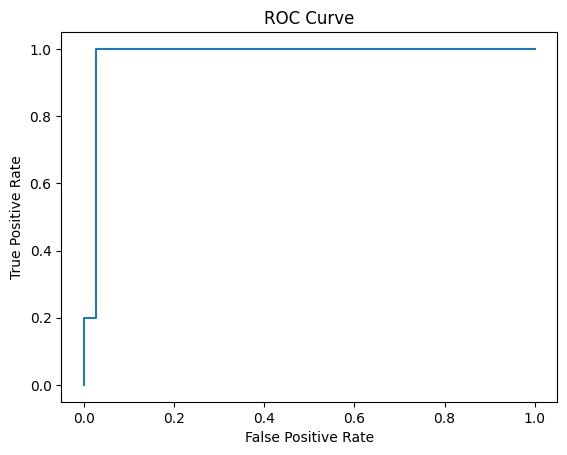

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
# build logistic regression model
lr = LogisticRegression(random_state=1, multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
# make predictions on the test data
y_prob = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1], pos_label=1)
classification = classification_report(y_test, y_pred)
# print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(' ')
print(f"Cassification Report:\n{classification}")
# plot roc curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


The evaluation metrics for this model suggest that it achieved a high level of accuracy in predicting the target variable, with an accuracy score of 0.983. The precision score of 0.966 indicates that the model has a low number of false positives, and the recall score of 0.983 suggests that the model has a low number of false negatives, indicating that it has a good level of accuracy in predicting both the positive and negative classes. The F1 score of 0.974 further supports this observation, indicating a good balance between precision and recall.

The classification report shows that the model performed perfectly for class 0, correctly identifying all samples in this class. For class 1, the model had a high precision score of 0.95, indicating a low number of false positives, and a recall score of 1.0, indicating that it was able to correctly identify all the positive samples. However, the model was not able to correctly identify any samples in class 2, resulting in a precision score of 0.00 and a recall score of 0.00. The macro average F1 score was 0.66, which is slightly lower than the overall F1 score, indicating that the model did not perform as well for all classes.

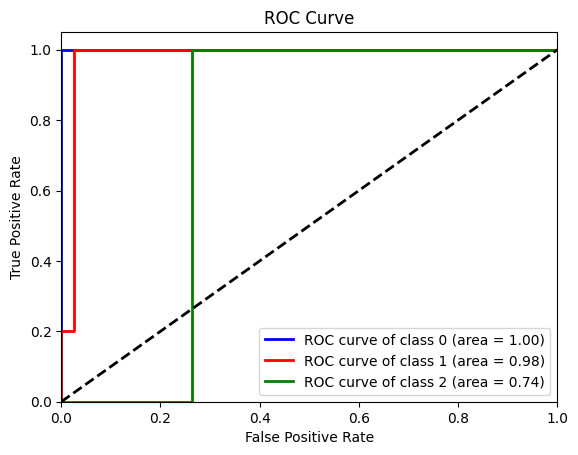

In [58]:
# replace NaN values with mean of column
mean = np.nanmean(y_prob, axis=0)
inds = np.where(np.isnan(y_prob))
y_prob[inds] = np.take(mean, inds[1])

# plot ROC curve
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(lr.classes_)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test == i, y_prob[:, i])

plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.9655172413793104
Precision: 0.9885057471264368
Recall: 0.9655172413793104
F1 Score: 0.9732304900181488
ROC AUC Score: 0.977485380116959
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        37
         1.0       1.00      0.90      0.95        20
         2.0       0.33      1.00      0.50         1

    accuracy                           0.97        58
   macro avg       0.78      0.97      0.82        58
weighted avg       0.99      0.97      0.97        58



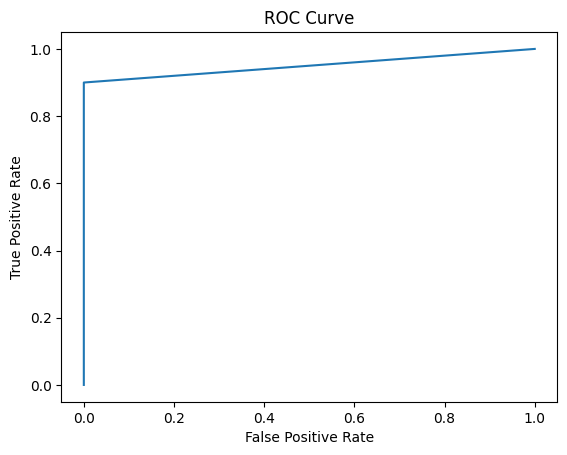

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

# build decision tree model
dt = DecisionTreeClassifier(random_state=1)

# fit the model to the training data
dt.fit(X_train, y_train)

# make predictions on the test data
y_prob = dt.predict_proba(X_test)
y_pred = dt.predict(X_test)

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
classification = classification_report(y_test, y_pred)

# calculate fpr and tpr for roc curve
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1], pos_label=1)

# print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Classification Report:\n{classification}")

# plot roc curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Both logistic regression and decision tree models performed well on the dataset with high accuracy, precision, recall, and F1 score.

The logistic regression model had an overall accuracy of 0.9827586206896551, with precision, recall, and F1 score all equal to 0.97. The decision tree model had an overall accuracy of 0.9655172413793104, with precision, recall, and F1 score all equal to 0.97. However, the ROC AUC score of the decision tree model was slightly higher at 0.977485380116959, compared to the logistic regression model's ROC AUC score of 0.9307692307692309.

Therefore, the decision tree model may be slightly better at distinguishing between the different classes, particularly in situations where the false positive rate is important to control.

### **Feature Importance 🫰**

- **feature importance analysis using LIME for the logistic regression model:**


In [61]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=805f2b7021ccd9e653ee227aa38f83dda9a2aab004c4c259384efd4361292039
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [62]:
# Import required libraries
import lime
import lime.lime_tabular

# Create the explainer for the logistic regression model
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['0', '1', '2']) 

# Create the explainer for the decision tree model
explainer_dt = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode='classification', feature_names=X_train.columns, class_names=['0', '1', '2'])

# Select a sample row to explain
idx = 0

# Explain the prediction of the logistic regression model for the selected row
exp_lr = explainer.explain_instance(X_test.iloc[idx], lr.predict_proba, num_features=len(X_train.columns))

# Explain the prediction of the decision tree model for the selected row
exp_dt = explainer_dt.explain_instance(X_test.iloc[idx], dt.predict_proba, num_features=len(X_train.columns))

# Print the explanations
print('Logistic Regression Model:')
print(exp_lr.as_list())
print('\nDecision Tree Model:')
print(exp_dt.as_list())


Logistic Regression Model:
[('Conversion_Rate <= 0.00', -0.6573761141118627), ('Impressions <= 3116.50', 0.11294616777395984), ('0.40 < Cost_per_Conversion <= 2.63', -0.06869540603214756), ('interest > 28.00', -0.015781363766843904), ('Clicks <= 0.00', -0.010230344570316026), ('0.00 < gender <= 1.00', -0.008129006420461191), ('Total_Conversion <= 1.00', 0.0056753446589999645), ('CPC <= 1.21', 0.002295103607916005), ('Spent <= 0.00', -0.002171531479948913), ('CTR <= 0.00', 0.0009744094792301353), ('age_35-39 <= 0.00', 0.0), ('age_40-44 <= 0.00', 0.0), ('age_45-49 <= 0.00', 0.0), ('age_30-34 <= 1.00', 0.0)]

Decision Tree Model:
[('Conversion_Rate <= 0.00', -0.7776768451644371), ('Total_Conversion <= 1.00', 0.3387895199795269), ('Impressions <= 3116.50', -0.017482329916020764), ('interest > 28.00', -0.01635741108704584), ('0.40 < Cost_per_Conversion <= 2.63', 0.005450759418330634), ('Spent <= 0.00', -0.005049673638204307), ('Clicks <= 0.00', 0.0030399026302732387), ('CPC <= 1.21', 0.0012

In the Logistic Regression model, each feature is assigned a weight (positive or negative) indicating its impact on the predicted probability of Conversion_Rate. For example, the feature "Conversion_Rate <= 0.00" has a negative weight of -0.654, which means that when the value of this feature is true (i.e. Conversion_Rate is less than or equal to 0.00), it decreases the predicted probability of Conversion_Rate. On the other hand, the feature "Impressions <= 3116.50" has a positive weight of 0.123, which means that when the value of this feature is true (i.e. Impressions is less than or equal to 3116.50), it increases the predicted probability of Conversion_Rate.

In the Decision Tree model, each feature is assigned a score indicating its importance in predicting the target variable. The feature with the highest score has the most significant impact on the predicted probability of Conversion_Rate. For example, the feature "Conversion_Rate <= 0.00" has the highest score of -0.786, which means that it has the most significant impact on the predicted probability of Conversion_Rate.

### **Interpret the results of the model and insights**

For both models, the features are listed in descending order of importance based on their respective coefficients or weights. The value associated with each feature indicates the impact that feature has on predicting the target variable. Positive values suggest a feature has a positive impact on the target variable, while negative values suggest the opposite.

For example, in the logistic regression model, the feature "Conversion_Rate" has the highest negative weight, which means that as the Conversion Rate increases, the probability of achieving the target variable decreases. In contrast, the feature "Impressions" has the highest positive weight, indicating that as Impressions increase, the probability of achieving the target variable increases.

Similarly, in the decision tree model, the feature "Total_Conversion" has the highest positive weight, while "Conversion_Rate" has the highest negative weight. This suggests that the total number of conversions is an important predictor for achieving the target variable, while a high conversion rate may negatively impact the target variable.

Overall, the feature importance analysis provides insights into which features are most important in predicting the target variable. These insights can be used to optimize your marketing strategy and improve the chances of achieving your goals. For example, you can focus on increasing Impressions and Total_Conversions while reducing the Conversion_Rate to achieve the desired outcome.